In [1]:
import argparse
import geopandas as geo
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import pandas as pd
import os
from pathlib import Path
from time import sleep
from random import random
from multiprocessing import Pool
from shapely.geometry import Polygon
from shapely.ops import unary_union
from shapely.ops import transform
from descartes import PolygonPatch
import networkx as nx
from mpl_toolkits import mplot3d
import settings
import base as cylinder
import copy
import math
DIR= r'C:/Users/wisch/Documents/GitProjects/cylinders_personal/'

In [4]:
#StemPath Class
#DIR = settings.DIRimport geopandas as geo
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import pandas as pd
import logging
import settings
import os
from pathlib import Path
from time import sleep
from random import random
from multiprocessing import Pool
from shapely.geometry import Polygon
from shapely.ops import unary_union
from descartes import PolygonPatch
import networkx as nx
from mpl_toolkits import mplot3d
from pickle import dump, load

import calendar
import time

current_GMT = time.gmtime()
time_stamp = str(calendar.timegm(current_GMT))

NAME = "Cylinder"
DIR= r'C:/Users/wisch/Documents/GitProjects/cylinders_personal/'
#DIR = settings.DIR
logging.basicConfig(filename=''.join(['log_',str(time_stamp)])  , filemode='w', level=logging.DEBUG)
logging.basicConfig(level=os.environ.get("LOGLEVEL", "INFO"))
log = logging.getLogger("my-logger")

class StemPath:
    
    #initialize our object level variables for cylider objects 
    #initialize our object level variables for cylider objects 
    def __init__(self,filename) -> None:
        self.filename = filename
        self.nodes =  []
        self.cyls =  CylinderCollection()
        self.graph = nx.DiGraph()
        self.tLength = np.nan
        self.maxBO = np.nan
        self.angles = []
        self.heights = []
        self.attr_dict = []
        self.projected_surface_area = np.nan
        self.branch_grps = []

    def load_path(self):
        return np.nan
    
    def identify_drip_points(self):
        for n in self.nodes:
            print(self.graph.edges[n])

    def get_cyl_data(gr, ):
        plt.rcParams["figure.figsize"] = [7.50, 3.50]
        plt.rcParams["figure.autolayout"] = True

        #sp = nx.shortest_path(nx.subgraph(gr,[e for e in gr.nodes if gr.degree(e)==1]),target=0, weight ='get_height')
        sp = nx.shortest_path(gr,target=0, weight ='get_height')
        #print([e for e in gr.nodes if gr.degree(e)==1])
        endnodes = [e for e in gr.nodes if gr.degree(e)==1]
        color = iter(cm.rainbow(np.linspace(0, 1, len(endnodes))))
        #print(len(endnodes))


        #print(gr.edges[1,0]['attr_dict']['eheight'])
        for path in sp.values():
            pathLen = len(path)
            #x =np.arange(0,pathLen-1)
            c = next(color)
            if (path[0] in endnodes)and pathLen>2:
                s = stemPath()
                fig, ax = plt.subplots()
                heights = []
                for idx,v in enumerate(path):
                    if idx+1!=pathLen:
                        u = path[idx+1]
                        heights.append( gr.edges[v,u]['attr_dict']['eheight'])
                ax.plot(heights,color= c, label = str(path[0]))
        plt.show()              

In [5]:
#Read_file_names
def read_file_names():
    os.chdir(''.join([DIR,'input']))
    fullPath = Path(''.join([DIR,'input']))
    paths = sorted(fullPath.iterdir(),key=os.path.getmtime)
    fileNames = [f.name for f in paths if  f.suffix == '.csv' ]
    print(fileNames)
    return fileNames

In [151]:
#CC class
import geopandas as geo
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import pandas as pd
import logging
import settings
import os
from pathlib import Path
from time import sleep
from random import random
from multiprocessing import Pool
from shapely.geometry import Polygon
from shapely.ops import unary_union
from descartes import PolygonPatch
import networkx as nx
from mpl_toolkits import mplot3d
from pickle import dump, load
from stemPath import StemPath

import calendar
import time

current_GMT = time.gmtime()
time_stamp = str(calendar.timegm(current_GMT))

NAME = "Cylinder"
DIR= r'C:/Users/wisch/Documents/GitProjects/cylinders_personal/'
#DIR = settings.DIR
logging.basicConfig(filename=''.join(['log_',str(time_stamp)])  , filemode='w', level=logging.DEBUG)
logging.basicConfig(level=os.environ.get("LOGLEVEL", "INFO"))
log = logging.getLogger("my-logger")
#suggested libraries 
#import pytest as pt
#import logging as log # replace writes to the console with various logging 
class CylinderCollection:
    
    #initialize our object level variables for cylider objects 
    def __init__(self, filename) -> None:
        self.filename = filename
        self.z = np.nan
        self.y = np.nan
        self.z = np.nan
        self.radius = np.nan
        self.noCylinders = np.nan
        self.cLength = np.nan
        self.BO = np.nan
        self.maxBO = np.nan
        self.dx = np.nan
        self.dy = np.nan
        self.dz = np.nan
        self.theta = np.nan
        self.pID = np.nan
        self.pSV = []
        self.df_full = pd.DataFrame()
        self.df = pd.DataFrame()
        self.total_union = None
        self.stem_path_lengths = np.nan
        self.graph = nx.Graph()
        self.polyparts = []
        self.bID = np.nan
        self.stem_paths =  []
        self.dripPoints = []
        self.aV=pd.DataFrame()
        self.bV=pd.DataFrame()
        self.stemPaths=pd.DataFrame()

    #potential additional functions 

    #def cylinderUnion(T,chunkSize,itCount): 
    #    return np.nan

    #def
    #def
    #def
    #def
    def pickle_save(graph, name, path=''.join([DIR,'output/graphs/'])):
        nx.write_gpickle(graph, open(path + name, 'wb'))
    
    def load_stem_paths(self):  
        self.stempaths = np.load(''.join([DIR,'output/stems/',str(self.filename),'.npy']))

    def load_graph(self):
        gname =  str(''.join([DIR,'output/graphs/', self.filename.replace('.csv','.txt')]))
        with open(gname, 'rb') as file :
            self.graph = nx.read_gpickle(gname)
    # def pickle_load(fullpath,test):
    #     with open(fullpath, 'rb') as file :
    #         gr = nx.read_gpickle(file)
    #     return gr
 
    def read_csv(self,df = pd.DataFrame(), polys = []):
        #Columns [ID?,ParentID?,x1,y1,z1,x2,y2,z2,radius,?,?,lenght,? ,? ,? ,? ,? ,? ,? ,BO]
        #Colnums [1  ,2        ,3 , 4, 5, 6, 7, 8,9    ,10,11,12   ,13,14,15,16,17,18,19,20]
        # x = x2-x1, y =y2-y1, z=z2-z1
        #number of cyliders = cnt values for radius
        # Theta  = angle made buy the cylinder axis
        if('partial' not in self.filename):
            self.df_full = pd.read_csv(self.filename,header=0)
        else: 
            self.df_full = df
        self.maxBO = np.max(self.BO)
        #self.df = self.df_full 
        self.df=self.df_full#.iloc[:130,:]
        self.x = np.transpose(self.df.iloc[:,[3,6]].to_numpy())#columns 3 and 6 represent our x values
        #self.y = np.transpose(self.df.iloc[:,[4,7]].to_numpy())#columns 4 and 7 the y values 
        #self.z = np.transpose(self.df.iloc[:,[5,8]].to_numpy())#columns 5 and 8 the z values 
        # for side view
        self.z = np.transpose(self.df.iloc[:,[4,7]].to_numpy())#columns 4 and 7 the y values 
        self.y = np.transpose(self.df.iloc[:,[5,8]].to_numpy())#columns 5 and 8 the z values 
        self.pID =self.df.iloc[:,2].to_numpy()
        self.radius = self.df.iloc[:,9].to_numpy()
        self.noCylinders = self.radius.size
        self.cLength = self.df.iloc[:,12].to_numpy()
        self.BO = self.df.iloc[:,20].to_numpy()
        self.maxBO = np.max(self.BO)
        self.bID = self.df.iloc[:,24].to_numpy()
        self.dx = self.df.iloc[:,6].to_numpy() - self.df.iloc[:,3].to_numpy()
        self.dy = self.df.iloc[:,7].to_numpy() - self.df.iloc[:,4].to_numpy()
        self.dz = self.df.iloc[:,8].to_numpy() - self.df.iloc[:,5].to_numpy()
        if('partial' in self.filename): self.pSV = polys
        self.theta = np.arctan(self.dz/np.sqrt(self.dx**2 + self.dy**2))
        log.info(self.filename + " initialized")
    
    def create_wdgraph(self):
        R = {}
        sid = self.df[' ID']
        pid = self.df[' parentID']
        sid.min()
        sid = sid + 1
        pid = pid + 1

        noSeg = np.max(sid) + 2
        A = np.zeros((noSeg,noSeg))
        
        #color = iter(cm.rainbow(np.linspace(0, 1, noSeg)))
        
        attr = []
        gr = nx.Graph()
        for idx in range(noSeg-3):
            print(idx)
            #from row to column
            child =sid[idx]
            par = pid[idx]
            attr={"length" : self.df.iloc[pid[idx], 12],
                    "bheight": self.df.iloc[pid[idx], 5],
                    "eheight": self.df.iloc[pid[idx], 8],
                    "radius": self.df.iloc[pid[idx], 9],
                    "aV": self.aV[pid[idx]],
                    "bV": self.bV[pid[idx]],
                    "bV": self.bV[pid[idx]]
                    }
            gr.add_edge(child,par,attr_dict =attr)
        self.graph = gr

    #its pro-ject not prah-ject
    def project_cylinders(self):
        log.info(self.filename + " cylinder projection begun")
        noCirPoints = 360

        tCir = np.linspace(0,2*np.pi,noCirPoints) #360 evenly spaced points between 0 - 2pi (radian degrees)

        XOrtho = np.cos(tCir)
        YOrtho = np.sin(tCir)

        #unit vector at base of cylinder, pointing up cylinder axis
        vNorm = (np.sqrt(self.dx**2+self.dy**2+self.dz**2))
        aV = np.hstack((self.dx[:,None],self.dy[:,None],self.dz[:,None]))/vNorm[:,None]
        bV = -aV; #unit vector looking down from top circle (but not translated)
        self.aV = aV
        self.bV = bV
        #function to find orthgonal vectors
        oVz = lambda v,x,y : ((-v[0]*x - v[1]*y)/v[2])

        #initializing min max arrays+
        minZ = np.zeros_like(self.dz)
        maxZ = np.zeros_like(self.dz)

        pSV = [None]*self.noCylinders

        #for each cylinder
        for idx in range(self.noCylinders):

            #in the case there's no horizontal movement of the cylinder ends, it's
            #area is a circle.
            if not np.isnan(self.x[0,idx]):
                if np.logical_and(self.dx[idx] == 0, self.dy[idx] == 0):
            
                    pX = self.x[0,idx] + self.radius[idx]*XOrtho
                    pY = self.y[0,idx] + self.radius[idx]*YOrtho
                    cPS = Polygon(list(zip(pX,pY)))
                    minZ[idx] = np.min(self.z[:,idx])
                    maxZ[idx] = np.max(self.z[:,idx])
                else:
                    #find orthogonal vectors @ endpoints
                    aVp1 = np.hstack((aV[idx,1],-aV[idx,0]))
                    aVp2 = np.hstack((-aV[idx,1],aV[idx,0]))
                    bVp1 = np.hstack((bV[idx,1],-bV[idx,0]))
                    bVp2 = np.hstack((-bV[idx,1],bV[idx,0]))
                
                    aVp1 = aVp1/np.linalg.norm(aVp1)
                    aVp2 = aVp2/np.linalg.norm(aVp2)
                    bVp1 = bVp1/np.linalg.norm(bVp1)
                    bVp2 = bVp2/np.linalg.norm(bVp2)
                
                    #from each endpoint, use radius to find vertices of the rectangle
                    x1 = self.x[0,idx] + self.radius[idx]*aVp1[0]
                    y1 = self.y[0,idx] + self.radius[idx]*aVp1[1]
                    x2 = self.x[0,idx] + self.radius[idx]*aVp2[0]
                    y2 = self.y[0,idx] + self.radius[idx]*aVp2[1]  
                    x3 = self.x[1,idx] + self.radius[idx]*bVp1[0]
                    y3 = self.y[1,idx] + self.radius[idx]*bVp1[1]
                    x4 = self.x[1,idx] + self.radius[idx]*bVp2[0]
                    y4 = self.y[1,idx] + self.radius[idx]*bVp2[1]
            
            
                    #calculate set of orthgonal vectors using lambda function
                    ZOrtho = oVz(aV[idx,:],XOrtho,YOrtho)
                
                    #unit-ify the orthgonal vectors
                    uovd = np.sqrt(XOrtho**2 + YOrtho**2 + ZOrtho**2)
                    uov = np.hstack((XOrtho[:,None],YOrtho[:,None],ZOrtho[:,None]))/uovd[:,None]
            
                    #donot re unit-fy, you only want the horizontal component, not the
                    #renormalized horizontal component
                
                    #using only the X and Y components, find circle coods in plane of
                    #interest
                    xaC = self.x[0,idx] + uov[:,0]*self.radius[idx]
                    yaC = self.y[0,idx] + uov[:,1]*self.radius[idx]
                    zaC = self.z[0,idx] + uov[:,2]*self.radius[idx]
            
                    xbC = self.x[1,idx] + uov[:,0]*self.radius[idx]
                    ybC = self.y[1,idx] + uov[:,1]*self.radius[idx]
                    zbC = self.z[1,idx] + uov[:,2]*self.radius[idx]
            
                    minZ[idx] = np.min(np.vstack((zaC, zbC)))
                    maxZ[idx] = np.max(np.vstack((zaC, zbC)))
                
                    #assymble total package
                    rX = np.vstack((x1, x2, x3, x4))
                    rY = np.vstack((y1, y2, y3, y4))
            
                    #test for circle parts in polygon
                    c1 = Polygon(list(zip(xaC,yaC)))
                    bBox = Polygon(list(zip(rX,rY)))
                    c2 = Polygon(list(zip(xbC,ybC)))           
                    partsPS = [c1,bBox,c2]
            
                    try: 
                        cPS = unary_union(partsPS)
                    except:
                        print(np.any(np.isnan(xaC)))
                        print(yaC)
                        print(rX)
                        print(rY)
                        print(xbC)
                        print(ybC)
                #cPS = cPS.simplify(0.02,preserve_topology=False)               
                self.pSV.append(cPS) #save polygon
                            
                #print a progress update once every 10 thousand or so cylinders
                if np.random.uniform(0,1,1) < 0.0001:
                    log.info(self.filename + ': completed {} \n'.format(np.round((idx/self.noCylinders)*100,decimals=1)))
                    print('completed {} \n'.format(np.round((idx/self.noCylinders)*100,decimals=1)))

    def highlight_branch_order(self, bo):
        trunk_ids = []
        colors = ['']*len(self.pSV)
        rev_polys =['']*len(self.pSV)
        for idx, bo_i in enumerate(self.BO):
            if bo_i == bo: 
                trunk_ids.append(idx)
                colors[-idx] = 'Red'
                #polys.append(c.pSV[idx])
            else:
                colors[-idx] ='None'
            rev_polys[-idx] = self.pSV[idx]

        fig, ax = plt.subplots(figsize = (20,16)) 
        myPolys = geo.GeoSeries(rev_polys)
        myPolys.plot(color=colors,ax=ax, alpha = .5)
        plt.savefig(str(c.filename).replace('.csv','') +str("_output.svg"), format='svg', dpi=1200)     
        plt.ion()
        plt.show()        

    def plot_shortest_paths(self):
        plt.rcParams["figure.figsize"] = [7.50, 3.50]
        plt.rcParams["figure.autolayout"] = True
        gr= self.graph
        #sp = nx.shortest_path(nx.subgraph(gr,[e for e in gr.nodes if gr.degree(e)==1]),target=0, weight ='get_height')
        sp = nx.shortest_path(gr,target=0)
        #print([e for e in gr.nodes if gr.degree(e)==1])
        endnodes = [e for e in gr.nodes if gr.degree(e)==1]
        color = iter(cm.rainbow(np.linspace(0, 1, len(endnodes))))
        #print(len(endnodes))

        plots =[]
        fig, ax = plt.subplots()
        #print(gr.edges[1,0]['attr_dict']['eheight'])
        for path in sp.values():
            pathLen = len(path)
            #x =np.arange(0,pathLen-1)
            #col = next(color)
            if (path[0] in endnodes) and pathLen>2:
                s = StemPath(self.filename)
                s.nodes=path
                heights = []
                for idx,v in enumerate(path):
                    if idx+1!=pathLen:
                        u = path[idx+1]
                        heights.append( gr.edges[v,u]['attr_dict']['eheight'])
                s.heights.append(heights)
                self.stemPaths.append(s)
        for sp in self.stemPaths: 
            ax.plot(sp.heights, label = str(path[0]))
        plt.show()              
    
    def draw_polys(self):
        myPolys = geo.GeoSeries(self.pSV)
        myPolys.to_file(''.join([DIR,'output/polys/',self.filename.replace('.csv',''), '_projected.shp'])) 
        myPolys.plot()#.plot()
        print("plt created : " + ''.join([self.filename.replace('.csv',''),"_output.svg"]))
        plt.savefig(str(self.filename).replace('.csv','') +str("_output.svg"), format='svg', dpi=1200)
        plt.ion()
        plt.show()

    def compute_union(self):
        self.totalUnion = unary_union(self.pSV)

    def create_graph(self):
        # draft adjaceny matrix construction from prior matlab code
        R = {}

        sid = self.df[' ID']
        pid = self.df[' parentID']
        sid.min()
            
        sid = sid + 1
        pid = pid + 1
            
        #adjacency matrix construction from ID and parent ID

        #find unique ID and parent ID values

        #depending on what values exist, translate to a range compatible with square matrix indicies

        #For each segment ID and corresponding parent ID, fill element in square matrix

        #end
            
        noSeg = np.max(sid) + 2
        A = np.zeros((noSeg,noSeg))

        for idx in range(noSeg-3):
            #from row to column
            A[pid[idx],sid[idx]] = 1
            if np.random.uniform(0,1,1) < 0.0001:
                print('Finished {} entry \n'.format(idx))

        rows, cols = np.where(A == 1)
        edges = zip(rows.tolist(), cols.tolist())
        gr = nx.Graph()
        gr.add_edges_from(edges)
        self.graph= gr
        nx.write_gpickle(gr, open(''.join([DIR,'output/graphs/self.filename']), 'wb'))
 
    def define_stem_paths(self):
        print('test')

    def compute_stem_paths(self):
        gr = self.graph
        gnodes = [g for g in gr.nodes()]
        self.stem_path_lengths = np.zeros(len(gnodes))
        self.stem_paths[idx]=np.zeros(len(gnodes))
        for idx,pn in enumerate(gnodes):
            if pn == 0:
                continue
            tmp = nx.shortest_path(gr,pn,1)

            self.stem_paths[idx]=tmp
            #replacing nested for loop with numpy function, intersect1d
            _, _, sid_ind = np.intersect1d(tmp, self.df[' ID'], return_indices=True)
            
            #calculating the distance represnted by each cyl
            diffs = np.sqrt(np.diff(self.x[1,sid_ind])**2+np.diff(self.y[1,sid_ind])**2+np.diff(self.z[1,sid_ind])**2)

            #cumlength = np.cumsum(diffs)
            self.stem_path_lengths[idx] = sum(diffs)

            if np.random.uniform(0,1,1) <0.01:
                print("Just completed {} stempath...".format(idx))
            
            np.save(''.join([DIR,'output/polys/',self.filename.replace('.csv','.txt')]), self.stem_path_lengths)
        
        """
        endnodes = [x for x in gr.nodes() if gr.degree(x)==1]
        pathLen = np.zeros(len(endnodes),dtype="int_")

        for idx,pn in enumerate(endnodes):
            tmp = nx.shortest_path(gr,pn,1)
            pathLen[idx] = len(tmp)

        self.stem_path_lengths = np.empty((len(endnodes),np.max(pathLen)),dtype=np.float64)
        #set all elements to nan
        self.stem_path_lengths[:] = np.nan

        for idx,pn in enumerate(endnodes):
            if pn == 0:
                continue
            
            tmp = nx.shortest_path(gr,pn,1)

            #replacing nested for loop with numpy function, intersect1d
            _, _, sid_ind = np.intersect1d(tmp, sid, return_indices=True)
        
            diffs = np.sqrt(np.diff(self.x[1,sid_ind])**2+np.diff(self.y[1,sid_ind])**2+np.diff(self.z[1,sid_ind])**2)

            cumlength = np.cumsum(diffs)
            self.stempaths[idx,:cumlength.size] = cumlength
        if np.random.uniform(0,1,1) <0.01:
            print("Just completed {} stempath...".format(idx))
            
        """
    def generate_sub_cyls(self, cylIds):
        sub_df = self.df_full[self.df_full.index.isin(cylIds)]
        polys=[]
        for id in cylIds:
            polys.append(self.pSV[id])
        new_cyl = CylinderCollection(self.filename + '_partial')
        new_cyl.read_csv(sub_df, polys)
        return new_cyl
    
    def identify_drip_points(self):
        print('to create')



In [152]:
#Initialize cyls
# print("test")
# parser = argparse.ArgumentParser(description='Take in run params')
# parser.add_argument('read_load', metavar='rl', type=str)
# parser.add_argument('int_auto', metavar='ia', type=str)
# args = parser.parse_args() 
fileNames = read_file_names()
cyls = []
if 1==1 : #args.int_auto == 'a':
    stemlengths = {}
    for f in fileNames:
        c = CylinderCollection(f)
        print("Processing: " + f)
        c.read_csv()
        #c.create_graph()
        c.project_cylinders()
        #print('PlotAttempt')
        #c.draw_polys()
        #c.create_wdgraph()
        #c.plot_shortest_paths()
        # print('PlotCreated')
        cyls.append(c)
        # c.compute_stem_paths()
        # print('PathsComputed')


['Secrest07-32_000000.csv']
Processing: Secrest07-32_000000.csv


C:\Users\wisch\AppData\Local\Temp\ipykernel_19748\3916193695.py:123: RuntimeWarning: divide by zero encountered in true_divide
  self.theta = np.arctan(self.dz/np.sqrt(self.dx**2 + self.dy**2))


completed 40.9 



In [154]:
#Additional funtions to run past above

cyls[0].create_wdgraph()
#c.plot_shortest_paths()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
#stem path characterization 

# c= cyls[len(cyls)-1]
# c.graph=gr
# c.plot_shortest_paths()
# c.compute_stem_paths()
# print('PathsComputed')
# stemlengths[f] = c.stem_path_lengths
    
# savStemlengths = stemlengths
# for s in stemlengths:
#     tmp = stemlengths[s].flatten()
#     stemlengths[s] = tmp[~np.isnan(tmp)]
    
# stemlength_df = pd.DataFrame()

# for s in stemlengths:
#     tmp = pd.DataFrame(stemlengths[s], columns = [s])
#     stemlength_df = pd.concat([stemlength_df,tmp], ignore_index=True, axis=1)
     
# stemlength_df.columns = list(stemlengths.keys()) 
# hist = stemlength_df.hist(bins=100)
    
# stemlength_df.mean(axis=0)
# stemlength_df.std(axis=0)
# stemlength_df.columns = list(stemlengths.keys()) 
    
# stemlength_df.head()
# stemlength_df.to_csv(''.join([DIR,'output/stems/']) + '.csv')
# print("test")


In [153]:
#Digraph Create Code
c=cyls[1]
R = {}
sid = c.df[' ID']
pid = c.df[' parentID']
sid.min()
sid = sid + 1
pid = pid + 1
    
#adjacency matrix construction from ID and parent ID#find unique ID and parent ID values#depending on what values exist, translate to a range compatible with square matrix indicies#For each segment ID and corresponding parent ID, fill element in square matrix#end
    
noSeg = np.max(sid) + 2
A = np.zeros((noSeg,noSeg))
attr = []
gr = nx.DiGraph()
for idx in range(noSeg-3):
    print(idx)
    #from row to column
    child =sid[idx]
    par = pid[idx]
    attr={"length" : c.df.iloc[pid[idx], 12],
            "bheight": c.df.iloc[pid[idx], 5],
            "eheight": c.df.iloc[pid[idx], 8],
            "radius": c.df.iloc[pid[idx], 9],
            "aV": c.aV[pid[idx]],
            "bV": c.bV[pid[idx]]
            }
    gr.add_edge(child,par,attr_dict =attr)
rows, cols = np.where(A == 1)



IndexError: list index out of range

In [6]:
#Building stem_path objects
from stemPath import StemPath
c= cyls[0]
gr =c.graph
stemPaths = []
#sp = nx.shortest_path(nx.subgraph(gr,[e for e in gr.nodes if gr.degree(e)==1]),target=0, weight ='get_height')
sp = nx.shortest_path(gr,target=0, weight ='get_height')
#print([e for e in gr.nodes if gr.degree(e)==1])
endnodes = [e for e in gr.nodes if gr.degree(e)==1]
color = iter(cm.rainbow(np.linspace(0, 1, len(endnodes))))
#print(len(endnodes))
#print(gr.edges[1,0]['attr_dict']['eheight'])
for path in sp.values():
    pathLen = len(path)
    s = StemPath(c.filename)
    #x =np.arange(0,pathLen-1)
    if (path[0] in endnodes)and pathLen>2:
        s.nodes=path
        temp_attr_dict = []
        for idx,v in enumerate(path):
            if idx+1!=pathLen:
                u = path[idx+1]
                temp_attr_dict.append(gr.edges[v,u]['attr_dict'])
        s.attr_dict=temp_attr_dict
        stemPaths.append(s)



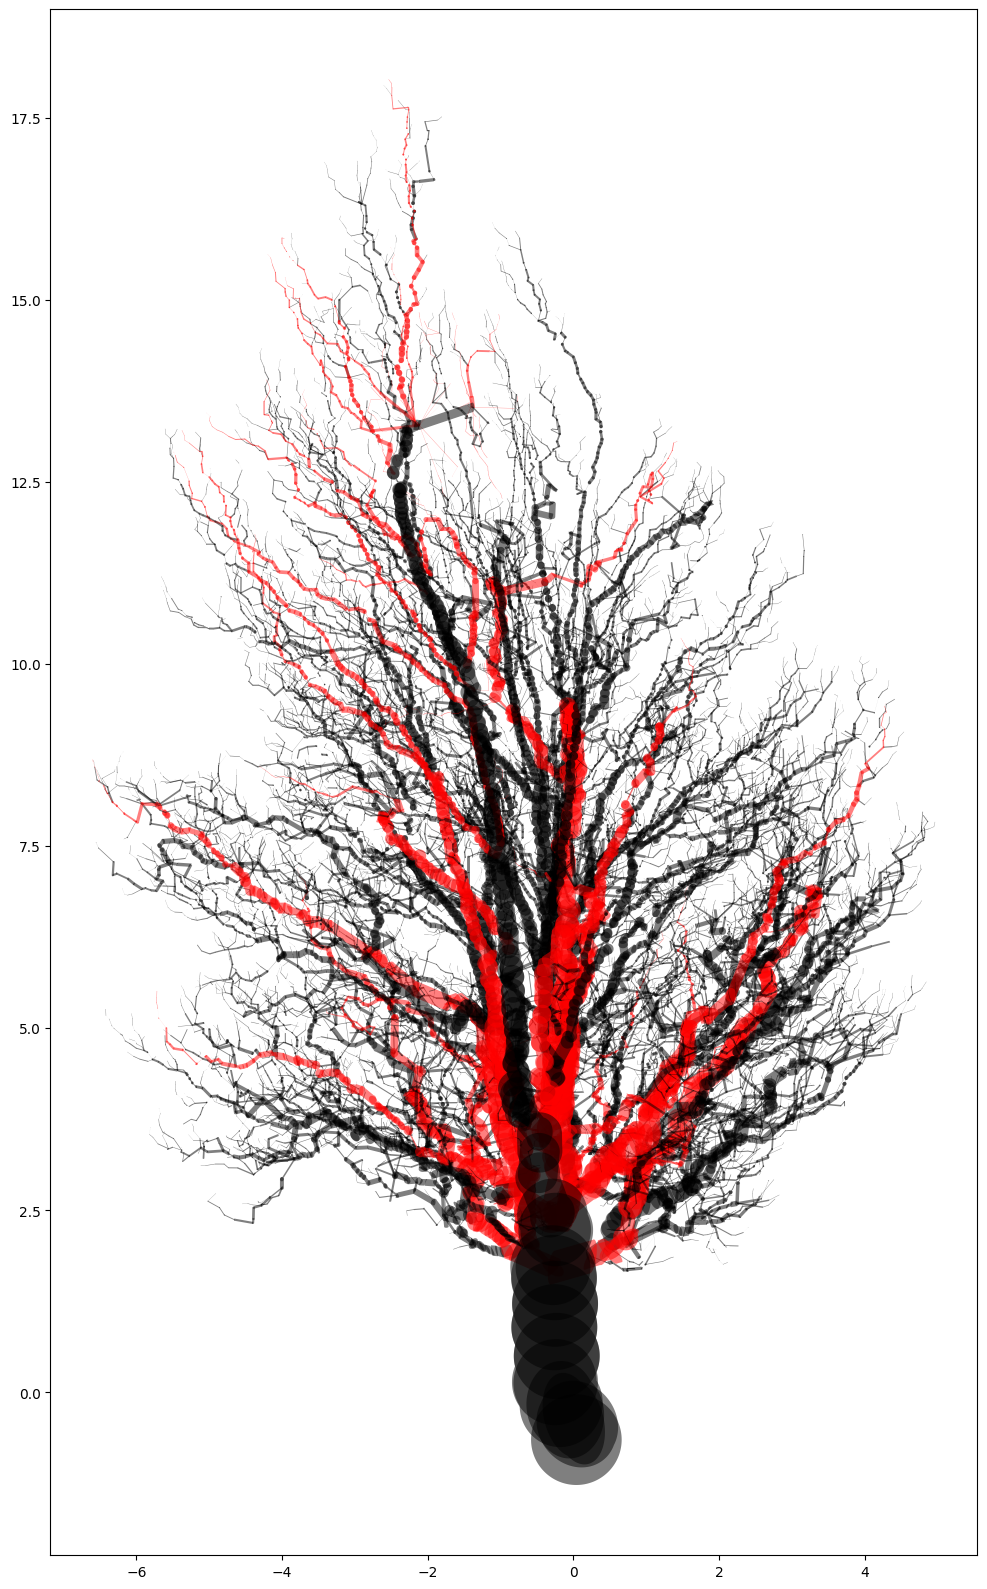

In [137]:
# draw branchs of specified branch order
trunk_ids = []
colors = ['']*len(c.pSV)
polys = []
rev_polys =['']*len(c.pSV)
for idx, bo in enumerate(c.BO):
    if bo == 1: 
        trunk_ids.append(idx)
        colors[-idx] = 'Red'
        #polys.append(c.pSV[idx])
    else:
        colors[-idx] ='None'
    rev_polys[-idx] = c.pSV[idx]

#myPolys = geo.GeoSeries(polys)
#myPolys.plot(color='red')

fig, ax = plt.subplots(figsize = (20,16)) 
myPolys = geo.GeoSeries(rev_polys)
myPolys.plot(color=colors,ax=ax, alpha = .5)
#myPolys.plot()
plt.savefig(str(c.filename).replace('.csv','') +str("_output.svg"), format='svg', dpi=1200)
        
plt.ion()
plt.show()


In [155]:
#Identifying trunkNodes
import copy
gtest = copy.deepcopy(gr)
print(gtest.number_of_nodes())
trunkNodes =  np.where(c.BO == 0)[0]

# pull connected components and create graphs 
#c.create_graph()
c=cyls[0]
gtest = copy.deepcopy(c.graph)
print(nx.number_connected_components(gtest))
gtest.remove_nodes_from(trunkNodes)
print(nx.number_connected_components(gtest))

nt_comps = nx.connected_components(gtest)

compGraphs = [gtest.subgraph(c).copy() for c in nt_comps]





27102
1
68


In [ ]:
cyl = c.generate_sub_cyls(compGraphs[10].nodes)

print(len(cyl.pSV))

In [51]:
#Finding the unoverlapped area for each comp (Slow)
# c= cyls[0]
# compGraphs =[g for g in compGraphs] # the list of generated subgraphs from our connected components 
# compPolys = []
# for f in compGraphs:
#     polys = []
#     for n in f.nodes:
#         polys.append(c.pSV[n])
# #     compPolys.append(polys)
# exposed_projected_area = []
# total_projected_area = []
# for i,x in enumerate(compPolys):
#     #Combined all other branches (And the trunk) into one shape and compute
#     #the overlap between the two
#     otherPolys = unary_union([unary_union(x) for idx,x in enumerate(compPolys) if idx!=i])
#     currPoly = unary_union(x)
#     currPoly_gs = geo.GeoDataFrame(geometry =  geo.GeoSeries(currPoly))
#     other_gs = geo.GeoDataFrame( geometry = geo.GeoSeries(otherPolys))
#     overlay = geo.overlay(other_gs, currPoly_gs, how= 'intersection')
#     tpa = currPoly_gs.area
#     oa = overlay.area
#     exposed_projected_area.append(tpa-oa)
#     total_projected_area.append(tpa)
    
# print(exposed_projected_area)
    




# #testing code for printing out a single overlap
# otherPolys = unary_union([unary_union(x) for i,x in enumerate(compPolys) if i!=6])

# myPolys_gs = geo.GeoSeries(unary_union(compPolys[6]))
# others_gs = geo.GeoSeries(otherPolys)
# myPolys = geo.GeoDataFrame(geometry = myPolys_gs)

# overlay = geo.overlay(others, myPolys, how= 'intersection')
# print(overlay.area)
# print(myPolys_gs.area)
# print(others_gs.area)

others = geo.GeoDataFrame( geometry = c.pSV)
toClip = geo.GeoDataFrame( geometry = c.pSV[0])

clipped = others.clip(toClip)


# print(len(others))
# print(len(clipped))

# fig, ax = plt.subplots(figsize = (20,16))
# others.plot(ax=ax,alpha=.5)
# clipped.plot(alpha=.5)
# plt.ion()
# plt.show() 

# fig, ax = plt.subplots(figsize = (20,16)) 
# myPolys = geo.GeoSeries(compPolys[6])
# others = geo.GeoSeries(otherPolys)
# others.plot(ax=ax,alpha=.5)
# myPolys.plot(ax=ax,alpha=.5)
 
       
# plt.ion()
# plt.show() 

ValueError: Unknown column POLYGON ((0.6630590000000001 -3.741772, 0.6629637518389192 -3.7308879609975385, 0.6626780365310453 -3.7200072558741493, 0.6622019415935477 -3.7091332174877087, 0.6615356128585894 -3.69826917665401, 0.6606792544286572 -3.6874184611265077, 0.6596331286140428 -3.676584394576994, 0.6583975558524954 -3.6657702955775293, 0.6569729146110689 -3.6549794765839345, 0.6553596412701931 -3.644215242921155, 0.6535582299900075 -3.6334808917708097, 0.6515692325589948 -3.6227797111612356, 0.6493932582249637 -3.6121149789603346, 0.6470309735084304 -3.601489961871533, 0.6444831019984576 -3.5909079144331604, 0.6417504241310127 -3.5803720780215564, 0.6388337769499131 -3.569885679858208, 0.6357340538504318 -3.5594519320212203, 0.6324522043056435 -3.5490740304614317, 0.6289892335755911 -3.538755154023461, 0.6253462023993664 -3.528498463472004, 0.621524226670196 -3.5183071005236575, 0.6175244770936329 -3.508184186884587, 0.6133481788289592 -3.498132823294318, 0.6089966111139082 -3.4881560885759533, 0.6044711068728233 -3.4782570386931, 0.5997730523083707 -3.4684387058138006, 0.5949038864769329 -3.458704097381755, 0.589865100847813 -3.44905619519511, 0.5846582388463842 -3.4394979544931097, 0.5792848953813254 -3.430032303050879, 0.5737467163560849 -3.420662140282619, 0.5680453981647262 -3.4113903363534916, 0.5621826871723077 -3.4022197313004607, 0.5561603791799545 -3.393153134162364, 0.5499803188747889 -3.38419332211948, 0.5436443992648857 -3.3753430396428503, 0.5371545610994272 -3.366604997653625, 0.530512792274234 -3.3579818726926853, 0.5237211272228549 -3.3494763061007893, 0.5167816462934014 -3.341090903209512, 0.5096964751113182 -3.332828232543203, 0.5024677839282855 -3.32469082503223, 0.4950977869574508 -3.316681173237727, 0.4875887416951958 -3.3088017305881037, 0.4799429482296451 -3.3010549106275366, 0.4721627485361282 -3.29344308627668, 0.4642505257598114 -3.285968589105817, 0.4562087034857192 -3.2786337086206823, 0.4480397449963684 -3.2714406915611614, 0.4397461525172425 -3.264391741213096, 0.431330466450337 -3.2574890167334005, 0.4227952645960122 -3.2507346324886877, 0.4141431613633893 -3.244130657407622, 0.4053768069695334 -3.2376791143471886, 0.3964988866276685 -3.2313819794730736, 0.3875121197246718 -3.225241181654345, 0.378419258988102 -3.219258601872625, 0.369223089643013 -3.2134360726459277, 0.3599264285588156 -3.2077753774673416, 0.350532123386444 -3.202278250258731, 0.3410430516860953 -3.196946374839618, 0.3314621200458067 -3.1917813844114162, 0.3217922631911415 -3.1867848610571645, 0.3120364430862564 -3.181958335256921, 0.3021976480266247 -3.177303285418964, 0.2922788917236954 -3.1728211374269404, 0.2822832123817653 -3.168513264203108, 0.2722136717673504 -3.164380985287795, 0.2620733542713388 -3.1604255664352103, 0.2518653659642146 -3.1566482192257377, 0.2415928336446396 -3.153050100694813, 0.2312589038816879 -3.149632312978514, 0.2208667420510227 -3.146395902975971, 0.2104195313653134 -3.143341862028685, 0.199920471899189 -3.1404711256168767, 0.1893727796090266 -3.1377845730729375, 0.1787796853478747 -3.135283027312083, 0.168144433875814 -3.132967254580287, 0.1574702828660583 -3.130837964219573, 0.1467605019070999 -3.1288958084507357, 0.1360183715012047 -3.1271413821735616, 0.1252471820595656 -3.125575222784604, 0.1144502328944194 -3.1241978100125753, 0.1036308312084382 -3.1230095657714, 0.0927922910817032 -3.1220108540309806, 0.0819379324565719 -3.121201980705708, 0.0710710801207506 -3.12058319356076, 0.0601950626888813 -3.1201546821362065, 0.0493132115829574 -3.119916577688952, 0.0384288600118794 -3.1198689531525314, 0.0275453419504626 -3.1200118231147678, 0.0166659911182105 -3.1203451438133074, 0.0057941399581674 -3.1208688131490208, -0.00506688138384 -3.1215826707172782, -0.0159137460792553 -3.122486497857085, -0.0267431316358306 -3.123580017718056, -0.0375517209153353 -3.124862895345218, -0.0483362031496257 -3.1263347377816126, -0.059093274954763 -3.127995094188659, -0.0698196413428692 -3.1298434559842505, -0.0805120167314121 -3.1318792569985394, -0.0911671259496083 -3.1341018736473583, -0.1017817052416379 -3.1365106251232304, -0.1123525032663617 -3.1391047736039064, -0.1228762820932369 -3.141883524478366, -0.1333498181941238 -3.1448460265902165, -0.1437699034306819 -3.1479913724984057, -0.1541333460370512 -3.1513185987551826, -0.1644369715975191 -3.1548266862012095, -0.1746776240188724 -3.158514560277738, -0.1848521664971366 -3.162381091355758, -0.1949574824784081 -3.166425095082012, -0.2049904766134816 -3.170645332741774, -0.2149480757059848 -3.175040511638279, -0.2248272296537244 -3.1796092854886853, -0.2346249123829615 -3.184350254836457, -0.2443381227753236 -3.189261967480027, -0.2539638855870757 -3.1943429189176205, -0.2634992523604636 -3.1995915528080983, -0.2729413023268521 -3.205006261447676, -0.2822871433013848 -3.2105853862623803, -0.2915339125688838 -3.216327218316083, -0.3006787777607278 -3.222229998833966, -0.3097189377224293 -3.2282919197412485, -0.3186516233716563 -3.2345111242170153, -0.3274740985464242 -3.2408857072629798, -0.3361836608432098 -3.2474137162870016, -0.3447776424447191 -3.2540931517011824, -0.3532534109370656 -3.260921967534359, -0.361608370116102 -3.267898072058801, -0.3698399607826597 -3.275019328430926, -0.3779456615264564 -3.282283555345837, -0.3859229894984248 -3.289688527705471, -0.393769501171234 -3.2972319773001706, -0.4014827930877609 -3.304911593503454, -0.4090605025972938 -3.312725023979784, -0.4165003085792309 -3.320669875405105, -0.4237999321540629 -3.3287437141999447, -0.4309571373814118 -3.3369440672748376, -0.4379697319449216 -3.345268422787856, -0.4448355678237839 -3.3537142309140116, -0.4515525419506948 -3.362278904626285, -0.4581185968560457 -3.3709598204880598, -0.4645317212981421 -3.379754319456704, -0.4707899508792677 -3.3886597076980567, -0.4768913686473943 -3.3976732574115758, -0.4828341056833642 -3.406792207665888, -0.4886163416733548 -3.4160137652444833, -0.4942363054664584 -3.425335105501308, -0.4996922756172006 -3.434753373225975, -0.5049825809128362 -3.444265683518342, -0.5101056008852547 -3.453869122672182, -0.5150597663073455 -3.463560749067677, -0.5198435596736661 -3.473337594072465, -0.5244555156652675 -3.483196662950956, -0.5288942215985346 -3.493134935781648, -0.5331583178579038 -3.503149368382157, -0.5372464983123261 -3.513236893241674, -0.5411575107153456 -3.5233944204605754, -0.5448901570886752 -3.5336188386968845, -0.5484432940891473 -3.5439070161193036, -0.5518158333589301 -3.5542558013665233, -0.5550067418589019 -3.564662024512512, -0.5580150421850795 -3.575122498037492, -0.5608398128680069 -3.5856340178043085, -0.5634801886550086 -3.5961933640398818, -0.5659353607752252 -3.606797302321455, -0.5682045771873462 -3.6174425845673257, -0.5702871428099682 -3.628125950031765, -0.5721824197345035 -3.63884412630381, -0.5738898274205777 -3.649593830309634, -0.575408842873855 -3.660371769318183, -0.5767390008062347 -3.671174641949767, -0.5778798937783747 -3.681999139187303, -0.5788311723244927 -3.6928419453898957, -0.5795925450594109 -3.703699739308451, -0.5801637787678106 -3.7145691951030018, -0.5805446984756673 -3.7254469833614423, -0.5807351875038472 -3.736329772119359, -0.5807351875038472 -3.7472142278806406, -0.5805446984756673 -3.7580970166385574, -0.5801637787678106 -3.768974804896998, -0.5795925450594109 -3.7798442606915486, -0.5788311723244927 -3.7907020546101036, -0.5778798937783748 -3.801544860812697, -0.5767390008062349 -3.812369358050233, -0.575408842873855 -3.8231722306818168, -0.5738898274205778 -3.833950169690366, -0.5721824197345036 -3.84469987369619, -0.5702871428099683 -3.8554180499682347, -0.5682045771873464 -3.866101415432674, -0.5659353607752253 -3.876746697678545, -0.5634801886550088 -3.887350635960118, -0.560839812868007 -3.8979099821956913, -0.5580150421850797 -3.9084215019625073, -0.555006741858902 -3.918881975487488, -0.5518158333589303 -3.9292881986334764, -0.5484432940891474 -3.939636983880696, -0.5448901570886754 -3.949925161303115, -0.5411575107153458 -3.9601495795394244, -0.5372464983123262 -3.9703071067583258, -0.5331583178579039 -3.980394631617843, -0.5288942215985347 -3.9904090642183516, -0.5244555156652678 -4.000347337049043, -0.5198435596736664 -4.010206405927535, -0.5150597663073458 -4.019983250932323, -0.5101056008852549 -4.029674877327818, -0.5049825809128365 -4.039278316481657, -0.499692275617201 -4.048790626774024, -0.4942363054664586 -4.058208894498692, -0.488616341673355 -4.067530234755516, -0.4828341056833645 -4.076751792334112, -0.4768913686473946 -4.0858707425884235, -0.4707899508792679 -4.094884292301943, -0.4645317212981426 -4.103789680543295, -0.458118596856046 -4.11258417951194, -0.4515525419506952 -4.121265095373715, -0.444835567823784 -4.129829769085989, -0.437969731944922 -4.138275577212143, -0.4309571373814121 -4.146599932725162, -0.4237999321540631 -4.1548002858000554, -0.4165003085792312 -4.162874124594895, -0.409060502597294 -4.170818976020216, -0.4014827930877612 -4.178632406496546, -0.3937695011712343 -4.18631202269983, -0.3859229894984254 -4.193855472294529, -0.3779456615264567 -4.201260444654163, -0.3698399607826603 -4.208524671569074, -0.3616083701161024 -4.215645927941199, -0.3532534109370662 -4.222622032465641, -0.3447776424447196 -4.229450848298817, -0.3361836608432099 -4.236130283712998, -0.3274740985464245 -4.24265829273702, -0.3186516233716565 -4.2490328757829845, -0.3097189377224299 -4.255252080258751, -0.3006787777607283 -4.261314001166033, -0.2915339125688842 -4.267216781683917, -0.2822871433013852 -4.27295861373762, -0.2729413023268528 -4.278537738552324, -0.2634992523604642 -4.2839524471919015, -0.253963885587076 -4.289201081082379, -0.2443381227753239 -4.294282032519973, -0.2346249123829619 -4.299193745163543, -0.2248272296537251 -4.303934714511315, -0.214948075705985 -4.308503488361721, -0.204990476613482 -4.312898667258226, -0.1949574824784085 -4.317118904917988, -0.1848521664971372 -4.321162908644242, -0.174677624018873 -4.325029439722262, -0.1644369715975194 -4.328717313798791, -0.1541333460370516 -4.332225401244817, -0.1437699034306824 -4.3355526275015945, -0.1333498181941244 -4.338697973409784, -0.1228762820932372 -4.341660475521634, -0.1123525032663621 -4.344439226396094, -0.1017817052416384 -4.347033374876769, -0.091167125949609 -4.349442126352642, -0.0805120167314128 -4.351664743001461, -0.0698196413428695 -4.35370054401575, -0.0590932749547634 -4.355548905811341, -0.0483362031496263 -4.357209262218388, -0.037551720915336 -4.3586811046547815, -0.0267431316358309 -4.359963982281944, -0.0159137460792557 -4.3610575021429145, -0.0050668813838405 -4.361961329282722, 0.0057941399581667 -4.362675186850979, 0.0166659911182097 -4.363198856186693, 0.0275453419504622 -4.363532176885232, 0.038428860011879 -4.363675046847469, 0.0493132115829569 -4.3636274223110485, 0.0601950626888806 -4.363389317863794, 0.0710710801207503 -4.36296080643924, 0.0819379324565715 -4.362342019294292, 0.0927922910817026 -4.36153314596902, 0.1036308312084375 -4.3605344342286, 0.1144502328944191 -4.359346189987425, 0.1252471820595651 -4.357968777215396, 0.1360183715012041 -4.356402617826439, 0.1467605019070992 -4.3546481915492645, 0.1574702828660576 -4.352706035780427, 0.1681444338758137 -4.350576745419713, 0.1787796853478742 -4.348260972687918, 0.189372779609026 -4.345759426927063, 0.1999204718991884 -4.3430728743831235, 0.2104195313653131 -4.340202137971315, 0.2208667420510223 -4.33714809702403, 0.2312589038816874 -4.333911687021486, 0.241592833644639 -4.330493899305188, 0.2518653659642138 -4.3268957807742625, 0.2620733542713385 -4.32311843356479, 0.27221367176735 -4.319163014712205, 0.2822832123817648 -4.315030735796892, 0.2922788917236948 -4.31072286257306, 0.3021976480266245 -4.306240714581037, 0.312036443086256 -4.3015856647430795, 0.321792263191141 -4.296759138942836, 0.331462120045806 -4.291762615588584, 0.3410430516860951 -4.286597625160383, 0.3505321233864436 -4.281265749741269, 0.3599264285588151 -4.2757686225326585, 0.3692230896430125 -4.270107927354073, 0.3784192589881014 -4.264285398127376, 0.3875121197246716 -4.258302818345656, 0.3964988866276681 -4.252162020526927, 0.405376806969533 -4.245864885652812, 0.4141431613633888 -4.239413342592378, 0.422795264596012 -4.2328093675113125, 0.4313304664503367 -4.2260549832666, 0.4397461525172421 -4.219152258786904, 0.448039744996368 -4.21210330843884, 0.4562087034857187 -4.204910291379319, 0.4642505257598111 -4.197575410894183, 0.4721627485361278 -4.190100913723321, 0.4799429482296447 -4.182489089372464, 0.4875887416951953 -4.174742269411897, 0.4950977869574506 -4.166862826762274, 0.5024677839282853 -4.158853174967771, 0.5096964751113179 -4.150715767456798, 0.516781646293401 -4.142453096790489, 0.5237211272228545 -4.134067693899212, 0.5305127922742338 -4.125562127307315, 0.5371545610994268 -4.116939002346375, 0.5436443992648854 -4.10820096035715, 0.5499803188747885 -4.099350677880521, 0.5561603791799544 -4.0903908658376364, 0.5621826871723076 -4.0813242686995395, 0.5680453981647259 -4.072153663646509, 0.5737467163560844 -4.062881859717382, 0.5792848953813253 -4.053511696949122, 0.5846582388463841 -4.0440460455068905, 0.5898651008478127 -4.034487804804891, 0.5949038864769326 -4.024839902618246, 0.5997730523083704 -4.0151052941862, 0.6044711068728233 -4.005286961306901, 0.608996611113908 -3.9953879114240474, 0.6133481788289589 -3.9854111767056826, 0.6175244770936327 -3.975359813115414, 0.6215242266701959 -3.965236899476343, 0.6253462023993663 -3.955045536527997, 0.6289892335755909 -3.9447888459765394, 0.6324522043056433 -3.9344699695385694, 0.6357340538504317 -3.9240920679787803, 0.638833776949913 -3.9136583201417925, 0.6417504241310126 -3.903171921978444, 0.6444831019984575 -3.8926360855668407, 0.6470309735084302 -3.882054038128468, 0.6493932582249636 -3.871429021039666, 0.6515692325589947 -3.860764288838765, 0.6535582299900073 -3.850063108229191, 0.655359641270193 -3.839328757078846, 0.6569729146110689 -3.8285645234160657, 0.6583975558524954 -3.8177737044224713, 0.6596331286140427 -3.806959605423007, 0.6606792544286572 -3.796125538873493, 0.6615356128585894 -3.7852748233459907, 0.6622019415935477 -3.774410782512292, 0.6626780365310453 -3.7635367441258514, 0.6629637518389192 -3.7526560390024626, 0.6630590000000001 -3.741772))

In [91]:
# print(compGraphs[10].nodes)
#testing 
c= cyls[0]
# add to self
#self.connComps = pd.DataFrame(columns=['fNodes','drips', 'flow'] 'len','SA','PA','exposedSA']
#Identifying trunkNodes
import copy
#def get_flows(self):
g =c.graph   
trunkNodes =  np.where(c.BO == 0)[0] 
gtest = copy.deepcopy(g)      
print(gtest.number_of_nodes())    
gtest.remove_nodes_from(trunkNodes)     
print(nx.number_connected_components(gtest))
titans = [node for node in gtest.nodes if (nx.degree(g,node)!=nx.degree(gtest,node))]
    #Nodes with a parent node in trunk, only 1 per connected component
c.connComps = nx.connected_components(gtest)
for idx,c in enumerate(c.connComps):
    compGraph = g.subgraph(c).copy()
    root =list(set(titans) & set(compGraph.nodes)) #get root of connected component
    sp = nx.shortest_path(compGraph,target=root)
    angleSum=0
    dripNodes = [] #idx is nodeID, value is dripPathID
    flowNodes = [] #idx is nodeID, value is flowPathID
    flowPaths = pd.DataFrame(columns=['len','sa','pa','exposedSA','avgAngle']) #one per comp
    dripPaths = pd.DataFrame(columns=['len','sa','pa','exposedSA','avgAngle']) #multiple per comp
    #arrays we are using are all unit arrays and we want angles with x,y and z ([1,0,0],[0,1,0] and [0,0,1])
    get_angle_array = lambda v :  [math.arccos(v[0]),math.arccos(v[1]),math.arccos(v[2]),math.arccos((v[0] + v[1])/math.sqrt(2))]
    for path in sp.values():
        attr = pd.DataFrame({    'cyls' : 0
                                ,'len' : 0
                                ,'sa' : 0
                                ,'pa' : 0
                                ,'esa': 0
                                ,'aa' : 0
                            }, index = [0])
        angles = [0,0,0]
        prev_angles = [0,0,0]
        for idx,n in enumerate(path):
            node = n+1
            if idx+1<=len(path):
                curr_angles = get_angle_array(c.aV[n])
                next_angles = get_angle_array(c.aV[path[idx+1]])
                angle_diffs = curr_angles - next_angles
                is_drip_point = c.dz<=0 or angle_diffs[3]>(math.pi/3)
                angleSum +=curr_angles[3]
            attr['cyls']+=1
            attr['len'] +=c.cLength[node]
            attr['sa' ] +=2*np.pi*c.radius[node]*(c.radius[node] +c.length[node])
            attr['pa' ] +=c.pSV[node].area
            dripPath = dripNodes[n]
            flowPath = flowNodes[n]
            if np.notnull(dripPath):
                dripPaths.iloc[dripPath] += attr.iloc[0]
                dripPaths[dripPath,['avgAngle']]=  (dripPaths['avgAngle'][dripPath]*dripPaths['cyls'][dripPath] + angleSum*attr['cyls'][0])/ (dripPaths['cyls'][dripPath] +attr['cyls'][0] )
                break
            elif np.notnull(flowPath):
                flowPaths.iloc[flowPath] += attr.iloc[0]
                flowPaths[dripPath,['avgAngle']]=(flowPaths['avgAngle'][flowPath]*flowPaths['cyls'][flowPath] + angleSum*attr['cyls'][0])/ (flowPaths['cyls'][flowPath] +attr['cyls'][0] )
                break
            elif is_drip_point:
                dripPaths = pd.concat(dripPaths)
                
              
            else:np
                #drip
        
        temp_attr_dict.append(gr.edges[v,u]['attr_dict'])
#             pathLen = len(path)
#             #x =np.arange(0,pathLen-1)
#             #col = next(color)
#             if (path[0] in endnodes) and pathLen>2:
#                 s = StemPath(self.filename)
#                 s.nodes=path
#                 heights = []
#                 for idx,v in enumerate(path):
#                     if idx+1!=pathLen:
#                         u = path[idx+1]
#                         heights.append( gr.edges[v,u]['attr_dict']['eheight'])
#                 s.heights.append(heights)
#                 self.stemPaths.append(s)
    #increment 
    
    self.connComps[idx][]

    # compGraph = g.subgraph(c).copy()
    # endnodes = [e for e in compGraph.nodes if compGraph.degree(e)==1]
    
   # currComp    
   # connGraph   
   # dripPoints  
                 
   # dripPaths   
   # stem_paths  
       #curr_path
       #curr_node

# get_flows
# plt.rcParams["figure.figsize"] = [7.50, 3.50]
#         plt.rcParams["figure.autolayout"] = True
#         gr= self.graph
#         #sp = nx.shortest_path(nx.subgraph(gr,[e for e in gr.nodes if gr.degree(e)==1]),target=0, weight ='get_height')
#         sp = nx.shortest_path(gr,target=0)
#         #print([e for e in gr.nodes if gr.degree(e)==1])
#         endnodes = [e for e in gr.nodes if gr.degree(e)==1]
#         color = iter(cm.rainbow(np.linspace(0, 1, len(endnodes))))
#         #print(len(endnodes))

#         plots =[]
#         fig, ax = plt.subplots()
#         #print(gr.edges[1,0]['attr_dict']['eheight'])
#         for path in sp.values():
#             pathLen = len(path)
#             #x =np.arange(0,pathLen-1)
#             #col = next(color)
#             if (path[0] in endnodes) and pathLen>2:
#                 s = StemPath(self.filename)
#                 s.nodes=path
#                 heights = []
#                 for idx,v in enumerate(path):
#                     if idx+1!=pathLen:
#                         u = path[idx+1]
#                         heights.append( gr.edges[v,u]['attr_dict']['eheight'])
#                 s.heights.append(heights)
#                 self.stemPaths.append(s)
#         for sp in self.stemPaths: 
#             ax.plot(sp.heights, label = str(path[0]))
#         plt.show() 


27102
68


In [11]:
# identifying components and summarizing 
import copy
#c.create_graph()
g=c.graph
gtest = copy.deepcopy(g)
print(nx.number_connected_components(gtest))
gtest.remove_nodes_from(trunkNodes)
print(nx.number_connected_components(gtest))

nt_comps = nx.connected_components(gtest)

compGraphs = [gtest.subgraph(c).copy() for c in nt_comps]

compSize =[len(cc) for cc in nt_comps]

for x in compSize:
    print(x) 
# We have 68 connected components but 67 path groups?
#       must be the sement of length 1
#[1683, 1689, 952, 862, 6415, 2252, 2058, 506, 542, 467, 501, 21, 339, 1, 2984, 682, 59, 2, 2284, 2, 2, 324, 505, 329, 2, 2, 8, 2, 2, 30, 4, 231, 6, 288, 65, 158, 6, 2, 134, 11, 5, 240, 44, 2, 58, 39, 15, 12, 5, 3, 2, 2, 1, 1, 41, 11, 3, 2, 11, 3, 11, 7, 5, 3, 10, 3, 2, 1]


# print(len(compSize))
 
# print(len(sigComp))

# print(pd.DataFrame(compSize).describe())
#                  0
# count    68.000000
# mean    396.382353
# std     973.939178
# min       1.000000
# 25%       2.750000
# 50%      11.000000
# 75%     325.250000
# max    6415.000000
 

1
68


In [272]:
#getConnectedComponentNodes
#Goal is to create arrays containing the 


c= cyls[0]
compPolys = []
compNodes = []
totalLengths = []
totalSAs = []
for f in compGraphs:
    polys = []
    nodes = []
    l=0
    r=0
    sa=0
    for n in f.nodes:
        nodes.append(n)
        polys.append(c.pSV[n])
        l +=c.cLength[n]
        r += c.radius[n]
    compPolys.append(polys)
    compNodes.append(n)


    
print(stemPaths[1].attr_dict[1]['length'])

TotalLengths = []
TotalVolume = []
TotalProjectedSurfaceAreas= []
for sp in stemPaths:
    sp.cyls = c
    length,SA,pSA = 0
    for idx, n in enumerate(sp.nodes):
        if idx<len(sp.nodes)-1:
            l =c.cLength[n]
            r = c.radius[n]
            length+=l
            p
            length+=c.cLength[n] 
            print((c.cLength[cylNum],stemPaths[1]))

# for Node n in our path (same as that in graph) 
# cyls.clength[n] = lenghth of nth cylinder
# Also the length of the edge n to n-1 
# 
# if n is in a path, cyl=[n] is in the path for all but last node
    otherPolys = unary_union([unary_union(x) for idx,x in enumerate(compPolys) if idx!=i])
    currPoly = unary_union(x)
    currPoly_gs = geo.GeoDataFrame(geometry =  geo.GeoSeries(currPoly))
    other_gs = geo.GeoDataFrame( geometry = geo.GeoSeries(otherPolys))
    overlay = geo.overlay(other_gs, currPoly_gs, how= 'intersection')
    tpa = currPoly_gs.area
    oa = overlay.area
    exposed_projected_area.append(tpa-oa)
    total_projected_area.append(tpa)



0.092838


TypeError: cannot unpack non-iterable int object

2984


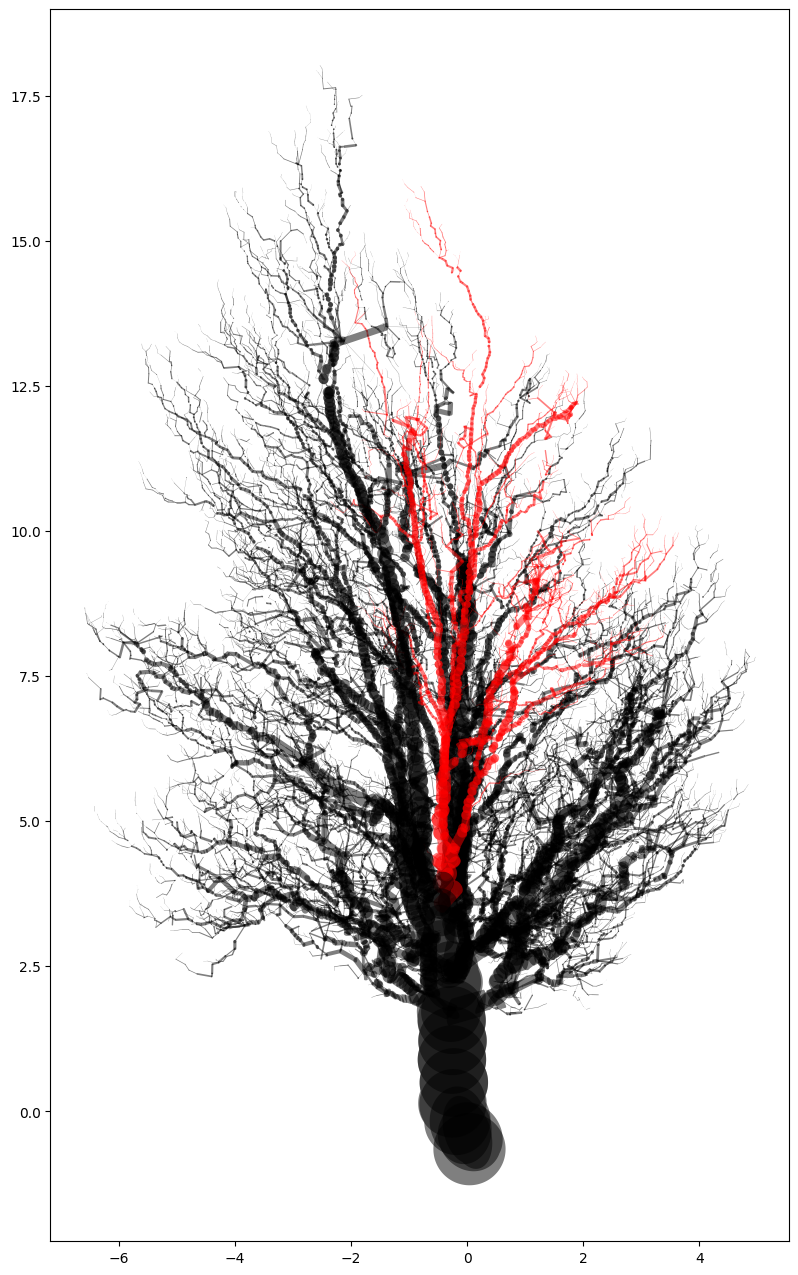

In [162]:

#draw a connected component
nodes = compGraphs[50].nodes
print(len(nodes))

#list(e for e in g.nodes if g.degree(e)==1)
# identify branchs of various orders
trunk_ids = []
colors = ['']*len(c.pSV)
polys = []
rev_polys =['']*len(c.pSV)
for idx, poly in enumerate(c.pSV):
    if idx in nodes: 
        colors[-idx] = 'Red'
    else:
        colors[-idx] ='None'
    rev_polys[-idx] = c.pSV[idx]

# #myPolys = geo.GeoSeries(polys)
# #myPolys.plot(color='red')

fig, ax = plt.subplots(figsize = (20,16)) 

myPolys = geo.GeoSeries(rev_polys)
myPolys.plot(color=colors,ax=ax, alpha = .5)
#myPolys.plot()
#plt.savefig(str(c.filename).replace('.csv','') +str("resr_output.svg"), format='svg', dpi=1200)
        
plt.ion()
plt.show()
fig.savefig(str(c.filename).replace('.csv','') +str("_output.svg"), format='svg', dpi=1200)